# **Single molecule filtering and density analysis**

In [1]:
from TOCCSL import *
%matplotlib widget

In [2]:
data_path = 'C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis_23_03_01/{}' #'//iap-fileserver-1.iap.tuwien.ac.at/sdt/DATA/Max_Drozd_2022/analysis/{}'

In [3]:

#Results_DensDiff_monovalent_Tracking_monovalent
results_path = 'C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis_23_03_01/PaperPlots_DensDiff/{}' #'//iap-fileserver-1.iap.tuwien.ac.at/sdt/DATA/Max_Drozd_2022/analysis/Dens_Diff_TOCCSL_divalent160ng_tbleach4s_trec3500ms_till5ms_attbleach1_Tracking_monovalent2ng_till5ms_delay10ms_uncor/{}'


In [4]:
import os
if not os.path.exists(results_path[:-3]):
    os.makedirs(results_path[:-3])

# **Data correction**

## **Correct data using recorded laser profile**

#### **define profile path and filenames**

- string or list of strings, empty string if none

In [5]:
profile_path = data_path.format('profile/{}')

filename = getfilenames(folder=data_path.format('profile'), extension='SPE')
if 'profile_mean.tif' in filename:
    filename.remove('profile_mean.tif')


if type(filename) == list:
    profile_file = [profile_path.format(t) for t in filename]
else:
    profile_file = profile_path.format(filename)

if type(profile_file) == list:
    make_mean_img(profile_file, profile_path.format('profile_mean.tif'))
    profile_file = profile_path.format('profile_mean.tif')
    filename = 'profile_mean.tif'
    
    
with pims.open(profile_path.format('profile_mean.tif')) as seq:
    profile_im = seq[0]

### **Setting parameters for masking out high density areas**

In [6]:
mask_num = None      # set start frame toccsl
mask_bool = False    # set True, if high density areas should be masked out

In [7]:
with pims.open(profile_path.format('profile_mean.tif')) as seq:
    profile_im = seq[0]

In [8]:
toccsl_files = getfiles(folder=data_path.format('TOCCSL'), extension='SPE')

sm_files = getfiles(folder=data_path.format('sm'), extension='SPE')
sm_folder = data_path.format('sm')

### **Perform data correction**

In [9]:
mask_toccsl_bool, smoothed_toccsl = correct_data(toccsl_files, profile_file, roi_coordinates=crop(profile_im), mask_num=mask_num, mask_bool=mask_bool)

Files:   0%|          | 0/60 [00:00<?, ?it/s]

C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis_22_12_20/TOCCSL/TOCCSL_divSav_AF647_att008_till5ms_trec6s_tbleach4s001_exclude.SPE.
  warnings.warn("Number of frames according to file header "
C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis_22_12_20/TOCCSL/TOCCSL_divSav_AF647_att008_till5ms_trec6s_tbleach4s002_.SPE.
  warnings.warn("Number of frames according to file header "


KeyboardInterrupt: 

In [ ]:
mask_sm_bool, smoothed_sm = correct_data(sm_files, profile_file, crop(profile_im), mask_num=mask_num, mask_bool = mask_bool)

### **Save corrected data**

In [12]:
with open(data_path.format('TOCCSL/corrected.txt'), 'wb') as f: 
    pickle.dump([mask_toccsl_bool, smoothed_toccsl, mask_sm_bool, smoothed_sm], f)

### **Load previously saved data**

In [9]:
with open(data_path.format('TOCCSL/corrected.txt'), 'rb') as f:
    temp = pickle.load(f)
    [mask_toccsl_bool, smoothed_toccsl, mask_sm_bool, smoothed_sm] = temp

### **Choose if corrected or uncorrected data should be used**

In [10]:
use_corrected = True
if use_corrected == False:
    corr_folder = 'uncorrected'
else:
    corr_folder = 'corrected'

# **Localization of single molecules**

In [11]:
!python -m sdt.gui.locator

C:\Users\mrdxy\anaconda3\lib\runpy.py:127: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Exception ignored in: <function Pool.__del__ at 0x000001DC211E2B80>
Traceback (most recent call last):
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\pool.py", line 268, in __del__
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\queues.py", line 362, in put
AttributeError: 'NoneType' object has no attribute 'dumps'
Exception ignored in: <function Pool.__del__ at 0x000001DC211E2B80>
Traceback (most recent call last):
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\pool.py", line 268, in __del__
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\queues.py", line 362, in put
AttributeError: 'NoneType' object has no attribute 'dumps'


# **ROI selection**

## **create ROI objects**

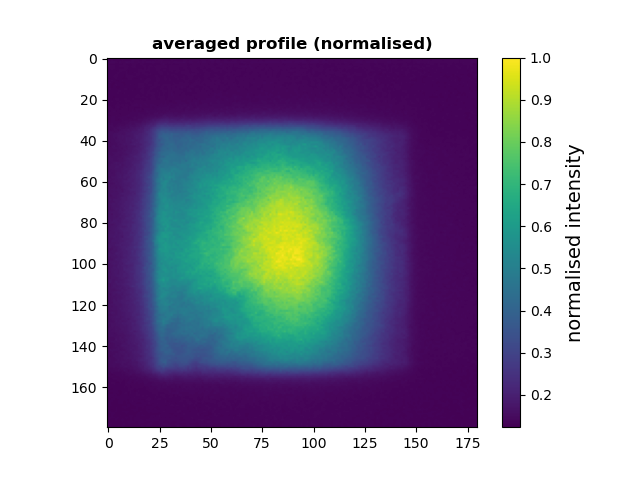

In [11]:
### Choose which profile to use
profile_folder_name = 'profile'


profile_path = data_path.format(profile_folder_name+'\\{}')
filename = getfilenames(folder=data_path.format(profile_folder_name))

profile_im, profile_file = get_mean_profile(filename, profile_path, profile_frame=0)

In [12]:
px_size = 0.16 #micrometer

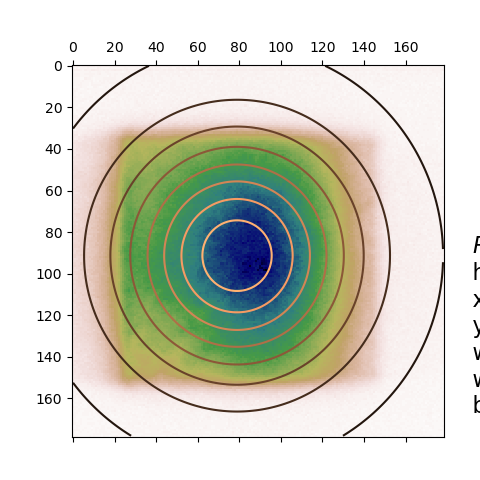

In [13]:
roi_coordinates = crop(profile_im)
r = roi.ROI(roi_coordinates[0], roi_coordinates[1])
crop_roi = r
profile_im_cropped = r(profile_im) # Commented out by Max
#profile_im_cropped = profile_im # Added by Max

fit_rel = get_fit_mask(profile_im_cropped, profile_path, profile_file.split('\\')[-1], fig_show=False)
fit_parameters = fitgaussian(profile_im_cropped)
    
area_cropped = np.shape(profile_im_cropped)[0] * np.shape(profile_im_cropped)[1] * px_size**2

In [14]:
central_center = True # If True, the Area center is taken as the ROI center, if False the intensity maximum

In [15]:
# Getting center of the gaussian profile fit
# Be very careful with the indices!!! Weird stuff is going on.
x_center = fit_parameters[2]
y_center = fit_parameters[1]
x_sigma = fit_parameters[4]
y_sigma = fit_parameters[3]
roi_center = (x_center, y_center)
print('The center is at x:', x_center, 'y:', y_center, 'with widths x:', x_sigma, 'y:', y_sigma)

The center is at x: 78.91405166894785 y: 91.33688090332674 with widths x: 38.53132935826987 y: 39.27100512861963


In [16]:
size_x, size_y = profile_im.shape

In [17]:
normalized_profile = np.array(profile_im_cropped)/np.max(np.array(profile_im_cropped))
normalized_profile = ndimage.gaussian_filter(normalized_profile, 4)

In [18]:
# Getting size of the aperture
aperture_thresh = 0.15 # Careful under 1.5 for the newest measurement

profile_im_temp = profile_im_cropped/np.max(profile_im_cropped)

one_side_reached = False
for i in range(profile_im_cropped.shape[0]):
    if one_side_reached:
        if max(profile_im_temp[i,:])>aperture_thresh:
            border_down = i
    else:
        if max(profile_im_temp[i,:])>aperture_thresh:
            border_up = i
            one_side_reached = True
one_side_reached = False
for i in range(profile_im_cropped.shape[1]):
    if one_side_reached:
        if max(profile_im_temp[:,i])>aperture_thresh:
            border_right = i
    else:
        if max(profile_im_temp[:,i])>aperture_thresh:
            border_left = i
            one_side_reached = True

In [19]:
if central_center:
    x_center = border_left+(border_right-border_left)/2; y_center = border_up+(border_down-border_up)/2
    roi_center = (x_center, y_center)

In [20]:
print('ROI Center:', roi_center)

ROI Center: (75.0, 92.0)


In [21]:
print(f'The area with an intensity larger than {aperture_thresh*100}% of the maximum is {round((border_right-border_left)*px_size, 3)}x{round((border_down-border_up)*px_size, 3)} mum^2')

The area with an intensity larger than 15.0% of the maximum is 24.0x21.76 mum^2


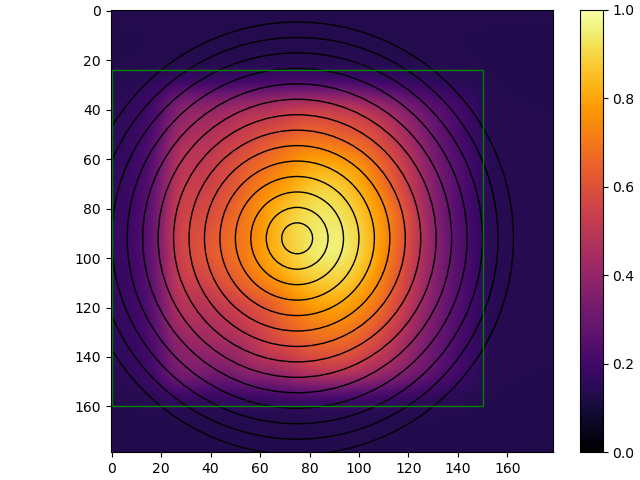

In [22]:
from matplotlib.patches import Circle, Rectangle

fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(normalized_profile, vmin=0, vmax=1, cmap= 'inferno')
cbar = plt.colorbar(im, ax = ax, aspect=20, pad=0.05)
fig.savefig(results_path.format('profile'))

for i in range(1, 15):
    temp_circle = Circle((x_center, y_center), radius=i/px_size, fill=False)
    ax.add_patch(temp_circle)

rectangle = Rectangle((border_left, border_up), border_right-border_left, border_down-border_up, fill=False, color='g')
ax.add_patch(rectangle)

## **Determine optimal ROI**

### **setting parameters**

In [23]:
##### set frame number of first recovery image
rec_frame = 5
##### set maximum false positive rate
#FR_max = 0.09
##### set assumed colocalistaion radius in µm
#R_coloc = 0.5
##### set camera pixel size
px_size = 0.16 #µm

In [24]:
min_roi_r = 3.0
max_roi_r = 7.0
roi_r_step = 0.25
levels = np.linspace(min_roi_r, max_roi_r, int((max_roi_r-min_roi_r)/roi_r_step + 1))
rois_to_evaluate = np.linspace(min_roi_r-roi_r_step, max_roi_r+roi_r_step, int((max_roi_r-min_roi_r)/roi_r_step + 3))
density = np.zeros(len(levels))
mean_densities = []

rois = [roi.EllipseROI((x_center, y_center), (r/px_size, r/px_size)) for r in rois_to_evaluate]

areas = [r.area*(px_size**2) for r in rois]
radii_circ = [np.sqrt(a/np.pi) for a in areas]

f = getfiles(folder=data_path.format(f'TOCCSL\{corr_folder}'), extension='h5')
roi_folder=data_path.format(f'TOCCSL\{corr_folder}')
num_file = len(f)

#### **Calculating mean densities for each ROI level**

In [25]:
######## calculating mean densities for each ROI level
#looping through all files
for ff,i in zip(tqdm(f, desc='Files'),range(num_file)):
    cur = io.load(ff)
    
    #looping through all levels/ rois
    for j in range(1, len(rois_to_evaluate)-1):
        cur_sel_prev = rois[j-1](cur)
        cur_sel_next = rois[j+1](cur)
        molecule_num = len(cur_sel_next[cur_sel_next['frame'] == rec_frame]) - len(cur_sel_prev[cur_sel_prev['frame'] == rec_frame])
        molecule_num = len(cur_sel_next[cur_sel_next['frame'] >10]) - len(cur_sel_prev[cur_sel_prev['frame'] >10])
        density[j-1] += molecule_num/(areas[j+1]-areas[j-1])
        
    if (i % 5) == 0 and i!= 0:
        mean_densities.append(density/i)
density = density/num_file

Files:   0%|          | 0/80 [00:00<?, ?it/s]

### **creating slider to set optimal ROI**

#### **Setting up**

In [26]:
def update_roi(change):
    '''
    Updates critical density and optimal roi overview figure
    '''
    global density
    ax_dens.clear()
    ax_dens.vlines(x=opt_roi(density_slider.value, density, levels), ymin=min(density), ymax=max(density), color='r', label='optimal ROI radius')
    ax_dens.hlines(y=density_slider.value, xmin=min(levels), xmax=max(levels), color='y', label='critical density')
    ax_dens.plot(levels, density, '-b', label = 'density')
    ax_dens.set_title('Densities')
    ax_dens.set_xlabel('ROI radius')
    ax_dens.set_ylabel('Density [molecules/$(\mu m)^2$]')
    ax_dens.legend()
    fig_dens.canvas.draw()

def create_button_roi(density):
    '''
    Creates button, which is used to indicate choosing density is done.
    Upon pressing button:
        a) the global variable dens_pos is fixed
        b) the density overview figure is saved as 'TOCCSL_critical_density.png'
        c) the set density and ROI are saved as 'optimal_roi.xlsx'
    Returns:
        button_s: Button ipywidget object
        output_s: Output reads the set density and according roi-level
    '''
    button_s = widgets.Button(description="Set!",button_style='info') # 'info', 'warning')
    output_s = widgets.Output()

    def on_button_clicked(b):
        with output_s:
            global roi_pos
            dens_pos = density_slider.value
            roi_pos = opt_roi(dens_pos, density, levels)

            print('Density: {}'.format(dens_pos))    #round(dens_pos,4)
            print('Resulting ROI radius: {}'.format(roi_pos))
            
            fig_dens.savefig(results_path.format('TOCCSL_critical_density.png'))
            filter_val = pd.DataFrame(data={'Density': dens_pos,'ROI': roi_pos},index = ['Set to: '])
            writer = pd.ExcelWriter(results_path.format('optimal_roi.xlsx')) 
            filter_val.to_excel(writer, sheet_name='Optimal ROI')

            df = filter_val
            for column in df:
                column_width = max(df[column].astype(str).map(len).max(), len(column))
                col_idx = df.columns.get_loc(column)
                writer.sheets['Optimal ROI'].set_column(col_idx+1, col_idx+1, column_width)

            writer.save()

    button_s.on_click(on_button_clicked)
    
    return button_s, output_s


step = 0.001
density_slider = create_slider_dens(step, density)

density_slider.observe(update_roi, 'value');

button_roi,output_roi = create_button_roi(density)  

In [27]:
create_slider_dens

<function optimal_roi.create_slider_dens(step, density)>

#### **widget**

FloatSlider(value=12.094449383791614, description='Critical den:', max=56.40678547381192, min=12.0944493837916…

Button(button_style='info', description='Set!', style=ButtonStyle())

Output()

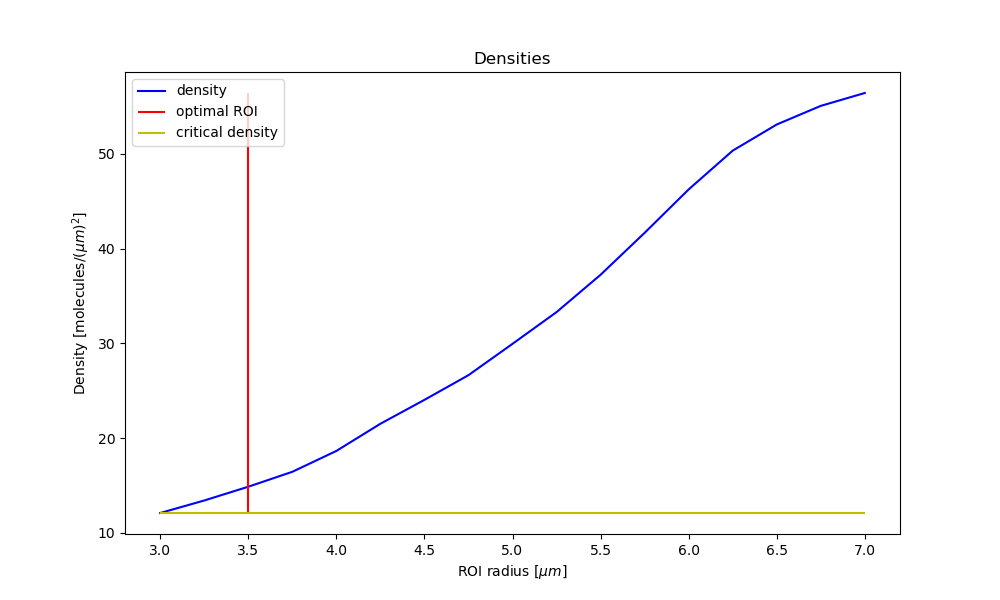

In [28]:
display(density_slider, button_roi,output_roi)     

fig_dens, ax_dens = plt.subplots(figsize=(10,6))

ax_dens.plot(levels, density, '-b', label = 'density')
ax_dens.vlines(x=opt_roi(density_slider.value, density, levels), ymin=min(density), ymax=max(density), color='r', label='optimal ROI')
ax_dens.hlines(y=density_slider.value, xmin=min(levels), xmax=max(levels), color='y', label='critical density')
ax_dens.set_title('Densities')
ax_dens.set_xlabel('ROI radius [$\mu m$]')
ax_dens.set_ylabel('Density [molecules/$(\mu m)^2$]')
ax_dens.legend()

#### **Fix optimal ROI**

In [29]:
#levels

In [30]:
############ choose ROI level
# roi_pos = 0.8 # roi_pos has to be in levels
#set_roi = make_ROI(fit_rel, chosen_value=roi_pos,fig_show=False)[0]

#idx = list(levels).index(roi_pos)
#chosen_circ_radius = radii_circ[idx]

#'ROI area corresponds to circle with a radius of {} µm.'.format(np.round(chosen_circ_radius,2))

In [31]:
#set_roi = make_ROI(fit_rel, chosen_value=roi_pos,fig_show=False)[0]

#idx = list(levels).index(roi_pos)
#chosen_circ_radius = radii_circ[idx]

#'ROI area corresponds to circle with a radius of {} µm.'.format(np.round(chosen_circ_radius,2))

In [32]:
manual_roi = True,
r = 4.94 # Specify radius in micro meters

if manual_roi:
    axis = r/px_size
    set_roi = roi.EllipseROI((x_center, y_center), (axis, axis))
    roi_id = r
else:
    roi_id = manual_roi

# <u>**SINGLE MOLECULE DATA**

### **Filtering single molecule data**

#### **Determine start frame**

In [33]:
use_toccsl_sm = False

if use_toccsl_sm:
    start_frame = 20
    sm_folder = data_path.format(f'TOCCSL/{corr_folder}')
else:
    start_frame = 20
    sm_folder = data_path.format(f'sm/{corr_folder}')

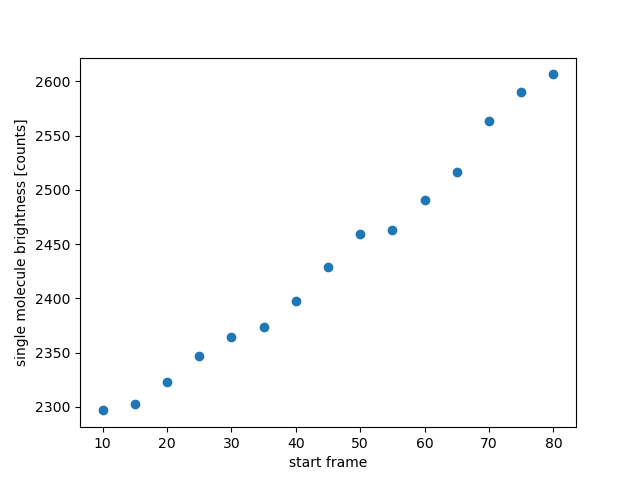

In [34]:
################### Generate plots for start frame vs. brightness
sms = []
for s in np.linspace(10,80,15):
    sms.append(get_sm_int(sm_folder, int_roi=set_roi, start_frame=s))

fig, ax = plt.subplots()

ax.plot(np.linspace(10,80,15), sms, 'o')
ax.set_ylabel('single molecule brightness [counts]')
ax.set_xlabel('start frame');

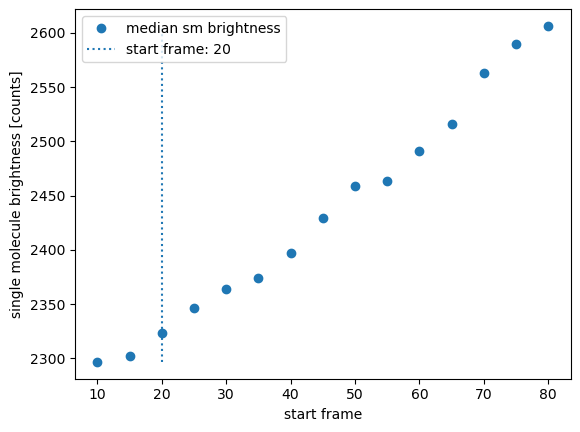

In [35]:
################### save image showing chosen start frame
ax.vlines(x=start_frame, ymin=min(sms), ymax=max(sms), ls='dotted');
ax.legend(['median sm brightness','start frame: {}'.format(start_frame)])
#fig.savefig(results_path.format('sm_start_frame.png'))
fig

#### **Setting up initial sm data**

In [36]:
sm_int_data = get_sm_dist(sm_folder, start_frame=start_frame, int_roi=set_roi)
sm_int_data_filtered = sm_int_data

#### **Setting up sliders**

In [37]:
size_slider, mass_slider, bg_slider = create_sliders(sm_int_data)

#### **Setting up button**

In [38]:
def create_button(sm_int_data, sm_folder):#=sm_folder):
    '''
    Creates button, which is used to indicate filtering is done.
    Upon pressing button:
        a) the global variable sm_int_data_filtered is fixed
        b) the single molecule overview figure is saved as 'sm_overview.png' in sm_folder
        c) the current filtering values as well as resulting mean single molecule intensities before and after filtering
           and the respective number of contributing molecules is saved in 'sm_filttering_parameters.xlsx' in sm_folder
    Returns:
        button_s: Button ipywidget object
        output_s: Output reads how much data is lost and how big the change in mean single molecule intensity is
    '''
    button_s = widgets.Button(description="Okay!")
    output_s = widgets.Output()

    def on_button_clicked(b):
        with output_s:
            global sm_int_data_filtered
            sm_int_data_filtered = filtering(sm_int_data, size_slider, mass_slider, bg_slider)

            lost = (1-len(sm_int_data_filtered)/len(sm_int_data))*100
            sm_bef = np.median(sm_int_data['mass'])
            sm_filt = np.median(sm_int_data_filtered['mass'])

            message = '{}% of data lost'.format(round(lost,2))
            message2 = '{}% of data lost; sm: {} counts (change of {}%)'.format(round(lost,2), round(sm_filt,2), round(100 - sm_filt/sm_bef *100,2))
            print(message2)# + 'sm: ' + sm_filt + ' (change of ' + sm_filt/sm_bef *100 + '%)')
            fig.suptitle(message2, weight='bold')
            fig.show()

            fig.savefig(results_path.format('sm_overview.png'))

            filter_val = pd.DataFrame(data={'Brightness unfiltered [counts]': [min(sm_int_data['mass']), max(sm_int_data['mass'])],
                                    'Brightness filtered [counts]': mass_slider.value, 
                                    'Background unfiltered [counts]': [min(sm_int_data['bg']), max(sm_int_data['bg'])],
                                    'Background filtered [counts]': bg_slider.value,
                                    'Size unfiltered [px]': [min(sm_int_data['size']), max(sm_int_data['size'])],
                                    'Size filtered [px]': size_slider.value,
                                    '|': ['|']*2,
                                    'sm intensity unfiltered [counts]': [sm_bef] + [' '],
                                    'sm intensity filtered [counts]': [sm_filt] + [' '],
                                    '# molecules unfiltered': [len(sm_int_data)] + [' '],
                                    '# molecules filtered': [len(sm_int_data_filtered)] + [' '],
                                   },
                                index = ['min', 'max'])

            writer = pd.ExcelWriter(results_path.format('sm_filtering_parameters.xlsx')) 
            filter_val.to_excel(writer, sheet_name='filtering parameters')

            df = filter_val
            for column in df:
                column_width = max(df[column].astype(str).map(len).max(), len(column))
                col_idx = df.columns.get_loc(column)
                writer.sheets['filtering parameters'].set_column(col_idx+1, col_idx+1, column_width)

            writer.save()

    button_s.on_click(on_button_clicked)
    
    return button_s, output_s

In [39]:
button_s, output_s = create_button(sm_int_data, sm_folder)

#### **Setting up figure and displaying interactive elements**

In [40]:
def update_all(change):
    '''
    Updates single molecule distribution overview figure
    '''
    global sm_int_data
    filtered = filtering(sm_int_data, size_slider, mass_slider, bg_slider)
    
    ax[0,0].clear()
    b = ax[0,0].hist(sm_int_data['mass'], bins=100);
    ax[0,0].hist(filtered['mass'], bins=b[1]);
    ax[0,0].set_xlabel('single molecule brightness [counts]')
    
    ax[0,1].clear()
    b = ax[0,1].hist(sm_int_data['bg'], bins=20);
    ax[0,1].hist(filtered['bg'], bins=b[1]);
    ax[0,1].set_xlabel('background [counts]')

    ax[0,2].clear()
    bins = ax[0,2].hist(sm_int_data['size'], bins=15)
    filt = ax[0,2].hist(filtered['size'], bins=bins[1])
    ax[0,2].set_xlabel('size [px]')
    
    ax[1,0].clear()
    ax[1,0].plot(sm_int_data['bg'], sm_int_data['mass'], 'o', markersize=1)
    ax[1,0].plot(filtered['bg'], filtered['mass'], 'o', markersize=1)
    ax[1,0].set_xlabel('background [counts]')
    ax[1,0].set_ylabel('single molecule brightness [counts]')
    
    ax[1,1].clear()
    ax[1,1].plot(sm_int_data['size'], sm_int_data['mass'], 'o', markersize=1)
    ax[1,1].plot(filtered['size'], filtered['mass'], 'o', markersize=1)
    ax[1,1].set_xlabel('size [px]')
    ax[1,1].set_ylabel('single molecule brightness [counts]')
    ax[1,1].set_xlim(left=0)
    ax[1,1].set_ylim(bottom=0)
    
    ax[1,2].clear()
    ax[1,2].plot(sm_int_data['size'], sm_int_data['bg'], 'o', markersize=1)
    ax[1,2].plot(filtered['size'], filtered['bg'], 'o', markersize=1)
    ax[1,2].set_xlabel('size [px]')
    ax[1,2].set_ylabel('background [counts]')
    ax[1,2].set_xlim(left=0)
    ax[1,2].set_ylim(bottom=0)

    fig.canvas.draw()
    
    
size_slider.observe(update_all, 'value');
mass_slider.observe(update_all, 'value');
bg_slider.observe(update_all, 'value');

FloatRangeSlider(value=(530.6562501549658, 12700.810085535888), description='Brightness:', max=12700.820085535…

FloatRangeSlider(value=(243.14227286403457, 445.47919480179087), description='Background:', max=445.4891948017…

FloatRangeSlider(value=(0.5080462330726419, 1.985378796946096), description='Size:', max=1.995378796946096, mi…

Button(description='Okay!', style=ButtonStyle())

Output()

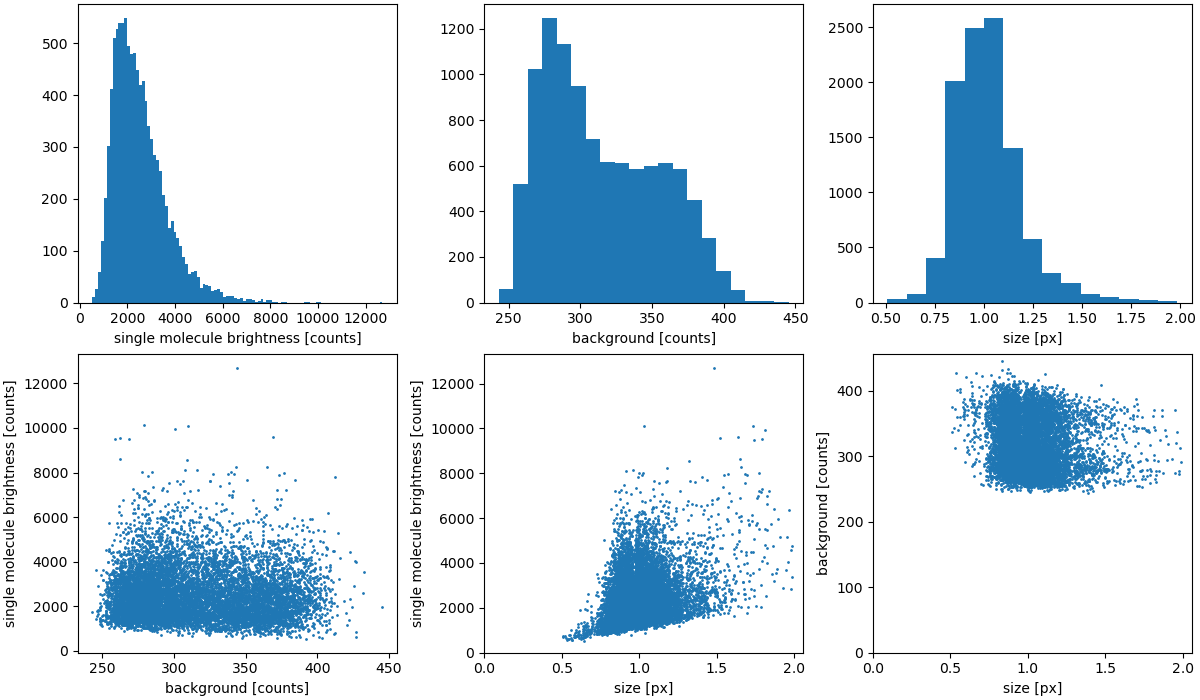

In [41]:
display(mass_slider, bg_slider, size_slider, button_s, output_s)

fig, ax = plt.subplots(2,3, figsize=(12,7), constrained_layout=True)
#fig.canvas.layout.width = '100%'
#fig.canvas.layout.height = '900px'

##################### brightness

b = ax[0,0].hist(sm_int_data['mass'], bins=100);
#ax[0,0].hist(sm_int_data_filtered['mass'], bins=b[1]);
ax[0,0].set_xlabel('single molecule brightness [counts]')

##################### background

b = ax[0,1].hist(sm_int_data['bg'], bins=20);
#ax[0,1].hist(sm_int_data_filtered['bg'], bins=b[1]);
ax[0,1].set_xlabel('background [counts]')

##################### size

#line, = ax.plot(x, np.sin(x))
bins = ax[0,2].hist(sm_int_data['size'], bins=15)
#filt = ax[0,2].hist(sm_int_data_filtered['size'], bins=bins[1])
ax[0,2].set_xlabel('size [px]')

##################### background vs. brightness

ax[1,0].plot(sm_int_data['bg'], sm_int_data['mass'], 'o', markersize=1)
#ax[1,0].plot(sm_int_data_filtered['bg'], sm_int_data_filtered['mass'], 'o', markersize=1)
ax[1,0].set_xlabel('background [counts]')
ax[1,0].set_ylabel('single molecule brightness [counts]')

##################### size vs. brightness

ax[1,1].plot(sm_int_data['size'], sm_int_data['mass'], 'o', markersize=1)
#ax[1,1].plot(sm_int_data_filtered['size'], sm_int_data_filtered['mass'], 'o', markersize=1)
ax[1,1].set_xlabel('size [px]')
ax[1,1].set_ylabel('single molecule brightness [counts]')
ax[1,1].set_xlim(left=0)
ax[1,1].set_ylim(bottom=0)

##################### size vs. background

ax[1,2].plot(sm_int_data['size'], sm_int_data['bg'], 'o', markersize=1)
#ax[1,2].plot(sm_int_data_filtered['size'], sm_int_data_filtered['bg'], 'o', markersize=1)
ax[1,2].set_xlabel('size [px]')
ax[1,2].set_ylabel('background [counts]')
ax[1,2].set_xlim(left=0)
ax[1,2].set_ylim(bottom=0);

### **Fix single molecule intensity**

In [42]:
sm_int = np.median(sm_int_data_filtered['mass'])
sm_len = len(sm_int_data_filtered) #### number of localisations used for sm calculation

sm_int

2316.806005809575

In [43]:
##### standard deviation of mean
sem = np.std(sm_int_data_filtered['mass'])/np.sqrt(len(sm_int_data_filtered))
rel_sem = sem/np.mean(sm_int_data_filtered['mass'])
#### standard deviation of median
semedian = 1.253 * sem
rel_semedian = semedian/np.median(sm_int_data_filtered['mass'])

sm_delta = rel_semedian
sm_delta

0.006087178790729875

# <u> **Density analysis**
    
   
$$I_\text{sm} \text{ : Mean single-molecule intensity} $$

$$I_\text{px} \text{ : Mean intensity of a pixel}$$

$$A_\text{px} \text{ : Effective pixel size}$$

$$ d = \frac{ I_\text{px}} {A_\text{px} I_\text{sm}} $$

In [43]:
px_size = 0.16 #[µm]
pre_bleach_frame = 1
bckg = 180 #estimation using ImageJ for now

######## ROI radius for in which the density is calculated
analysis_roi = 7.0
######## TOCCSL folder in which the density is calculated
dens_folder = data_path.format(f'TOCCSL/{corr_folder}')

######## take data from single molecule dataset starting at this frame
monomer_start_frame = 1
######## how many frames of the single molecule data should be taken
frames_taken = 1
######## choose which dataset the single molecule signals should be taken from (identifier meanings see below)
monomer_folder = data_path.format(f'sm/{corr_folder}')
######## ROI used for sm measurements in micro meters. If None, always the analysis ROI is taken.
monomer_roi = 7.0

In [44]:
axis = monomer_roi/px_size
temp_roi = [roi.EllipseROI((x_center, y_center), (axis, axis))][0]

monomer_data = get_sm_dist(monomer_folder, start_frame=0, int_roi=temp_roi)
monomer_data = monomer_data[monomer_data['frame']>=monomer_start_frame]
monomer_data = monomer_data[monomer_data['frame']<monomer_start_frame+frames_taken]

print(f'{len(monomer_data)} data points available of single molecule brightness measurements')

894 data points available of single molecule brightness measurements


In [45]:
##### standard deviation of mean
sem = np.std(monomer_data['mass'])/np.sqrt(len(monomer_data))
rel_sem = sem/np.mean(monomer_data['mass'])
#### standard deviation of median
semedian = 1.253 * sem
rel_semedian = semedian/np.median(monomer_data['mass'])

sm_delta = rel_semedian
sm_delta

0.02607311085386357

In [46]:
dens_files = getfiles(extension = 'tif' ,folder = dens_folder)

In [47]:
dens_img = {}
densities = {}
densities_error = {}

for f in dens_files:
    with pims.open(f) as seq:
        img = seq[pre_bleach_frame]
        axis = analysis_roi/px_size # Max
        set_roi = [roi.EllipseROI((x_center, y_center), (axis, axis))][0] # Max
        img = set_roi(img, fill_value=np.nan)
        dens_img[f.split('/')[-1]] = img
        img_sem = np.std(img[~np.isnan(img)])/np.sqrt(len(img[~np.isnan(img)]))
        
        densities[f.split('/')[-1]] = (np.nanmean(img)-bckg)/(px_size**2*sm_int) 
        densities_error[f.split('/')[-1]] = densities[f.split('/')[-1]] * np.sqrt((img_sem/np.nanmean(img))**2 + sm_delta**2)

In [48]:
dens_res = pd.DataFrame(data={'density [molecules/$(\mu m)^2$]': list(densities.values()), 'density error [molecules/$(\mu m)^2$]': list(densities_error.values()),
                             },
                        index = list(densities.keys()))
dens_res.to_excel(results_path.format(f'densities_smTOCCSL{use_toccsl_sm}_roi{analysis_roi}.xlsx'), sheet_name='densities')
dens_res

,density [molecules/$(\mu m)^2$],density error [molecules/$(\mu m)^2$]
diSav_160ng_rot_000_.tif,67.880771,1.782239
diSav_160ng_rot_001_.tif,79.539589,2.086656
diSav_160ng_rot_002_.tif,56.950037,1.503051
diSav_160ng_rot_003_.tif,79.517963,2.082729
diSav_160ng_rot_004_.tif,75.601173,1.985725
diSav_160ng_rot_005_.tif,78.504345,2.058344
diSav_160ng_rot_006_.tif,85.274445,2.234518
diSav_160ng_rot_007_.tif,81.366240,2.132663
diSav_160ng_rot_008_.tif,86.090927,2.258073
diSav_160ng_rot_009_.tif,93.639105,2.455838


In [49]:
np.mean(list(densities.values()))

112.87078421323561

# <u> **Diffusion analysis**

## **Tracking**

In [44]:
######## Choose wether TOCCSL or Tracking data should be used
use_toccsl = False

######## the maximum displacement in pixels between two frames that will still be linked to a track
max_displacement = 4
######## minimum track length for which molecules are considered for analysis
min_track_length = 1
######## the number of frames a particle is allowed to not be localized and still be linked to a single track
allowed_gap_size = 1
######## frame from which on particles are tracked
start_frame = 0 # Be careful to adapt to TOCCSL
######## If True a ROI is applied. If false the entire data is uses
use_sm_roi = True
######## If above is true, the radius of the ROI applied
roi_sm = 5.0 # in micrometers
######## conversion factor from counts to photons
conversion_factor = 15.7/300

In [45]:
if use_toccsl:
    diffusion_folder = data_path.format(f'TOCCSL/{corr_folder}')
else:
    diffusion_folder = data_path.format(f'sm/{corr_folder}')

In [46]:
h5_files = getfiles(extension='h5', folder=diffusion_folder)

In [47]:
if use_sm_roi:
    smroi_id = roi_sm
else:
    smroi_id = use_sm_roi

In [48]:
trc_data = []
for h5 in tqdm(h5_files, desc='files', leave=False):
    loc_data = io.load(h5)
    if use_sm_roi:
        axis = roi_sm/px_size
        sm_roi = roi.EllipseROI((x_center, y_center), (axis, axis))
        loc_data = sm_roi(loc_data)
    loc_data = loc_data[loc_data['frame']>=start_frame]
    cur = loc_data # cur = loc_data[loc_data['y']<(max(loc_data['y'])-2)] #
    tracked = trackpy.link(cur, search_range=max_displacement, memory=allowed_gap_size)
    trc_data.append(tracked)

    trc_data =  min_track_filter(trc_data, min_track_length=min_track_length)
remove_empty_panda(trc_data)

files:   0%|          | 0/80 [00:00<?, ?it/s]

In [49]:
def filter_out_statics(trc_data, thresh):
    
    trc_data_new = []
    distance2_histogram = []
    trc_data_copy = trc_data.copy()
    
    for tracks in trc_data_copy:
        for particle_num in np.unique(tracks['particle']):
            temp = tracks[tracks['particle']==particle_num]
            distance2_histogram.append(np.std(temp['x'])**2+np.std(temp['y'])**2)
            if (np.std(temp['x'])**2+np.std(temp['y'])**2) < thresh:
                tracks.drop(tracks.index[(tracks['particle']==particle_num)],axis=0,inplace=True)
        trc_data_new.append(tracks)
            
    distance2_histogram = np.array(distance2_histogram)
    
    return trc_data_new, distance2_histogram

Below 3 cells are used to filter out immobile particles. A threshold is set below squared displacements are filtered out.

In [50]:
thresh = 0.0 # squared displacement threshold below which is filtered out
trc_data_new, distance2_histogram = filter_out_statics(trc_data, thresh)

3

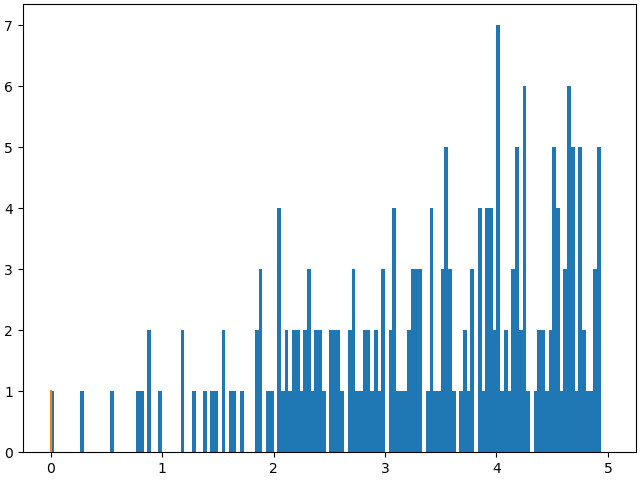

In [51]:
fig, ax = plt.subplots(constrained_layout=True)
ax.hist(distance2_histogram, bins=150, range=(0,5))
ax.plot([thresh, thresh], [0, 1])
3

In [52]:
# The filtering is applied to the data
trc_data = trc_data_new

#### **Calculate and check mean trajectory lengths, number of trajectories and number of localisations for each movie**

In [53]:
traj_num, traj_len, traj_steps = get_traj_parameters(trc_data)

**check respective values**

In [54]:
diff_res = pd.DataFrame(data={'number of trajectories': sum(traj_num), 'mean trajectory length [µm]': np.mean(traj_len), 'mean trajectory length [steps]': np.mean(traj_steps), },
                        index = [' '])
diff_res

,number of trajectories,mean trajectory length [µm],mean trajectory length [steps]
,670,4.378356,18.872603


#### **Plot trajectories for each cell**

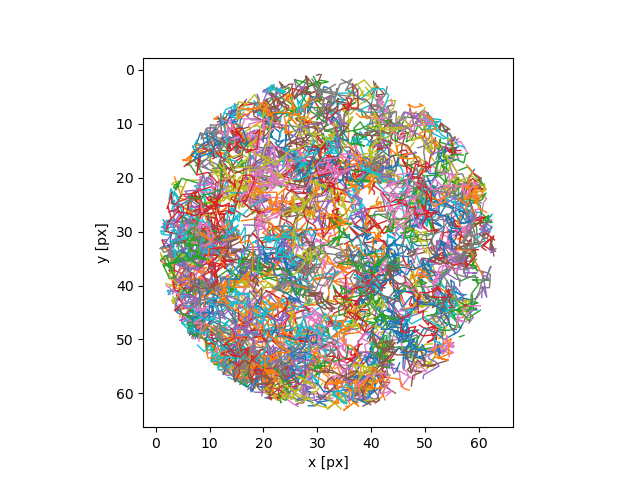

In [55]:
fig,ax = plt.subplots()
for t in trc_data:
    trackpy.plot_traj(t, ax=ax)
ax.set_aspect('equal')
fig.savefig(results_path.format(f'Particle_Tracks_useTOCCSL{use_toccsl}_smROI{smroi_id}.png'))

## **MSD analysis**

### **Settings**

In [56]:
pixel_size = 0.16
exp_time = 0.005 #s
t_del = 0.01 #s
fps = 1/(t_del+exp_time) #frames per second

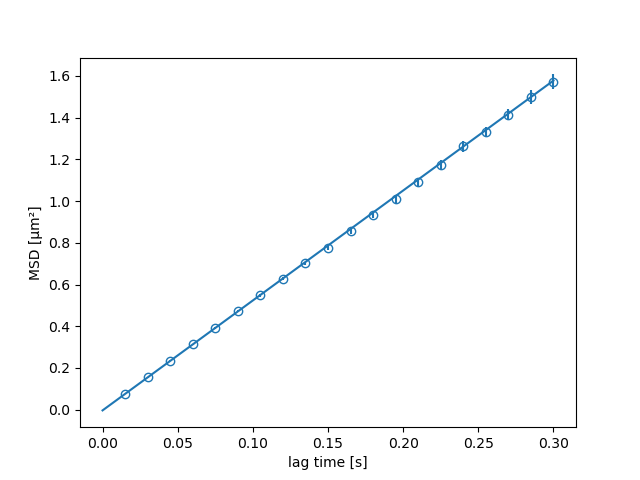

In [57]:
n_lag = 20 # Default=20
msd = motion.Msd(trc_data, fps, pixel_size=pixel_size, ensemble=True, n_lag=n_lag).fit("brownian", exposure_time=exp_time)
D, err = msd.get_results()

fig, ax = plt.subplots()
ax_msd = msd.plot(show_legend=False, ax=ax)

fig.savefig(results_path.format(f'MSD_plot_useTOCCSL{use_toccsl}_smROI{smroi_id}.png'))

In [58]:
diff_res['Diffusion constant [$(\mu m)^2$/s]'] = D['D']
diff_res['Diffusion constant error [$(\mu m)^2$/s]'] = err['D']
diff_res['Localisation precision [nm]'] = D['eps']
diff_res['Localisation precision error [nm]'] = err['eps']

diff_res.to_excel(results_path.format(f'diffusion_useTOCCSL{use_toccsl}_smROI{smroi_id}.xlsx'), sheet_name='densities')
diff_res

,number of trajectories,mean trajectory length [µm],mean trajectory length [steps],Diffusion constant [$(\mu m)^2$/s],Diffusion constant error [$(\mu m)^2$/s],Localisation precision [nm],Localisation precision error [nm]
,670,4.378356,18.872603,1.31791,0.02461,0.036172,0.006372


## **Jump Distance Analysis**

The below code is very much work in progress, so will likely be more difficult to use, with potential unspotted bugs. To give an idea, the first cells calculate different parameters of the tracks, for example mean squared displacements per track, an array with all squared displacements, or brightness values during the track. A histogram is then plotted with the MSD per particle track being one entry in the histogram each. Then the correlation between brightness and squared displacement is calculated, then the autocorrelation of squared displacements within the same track. Finally a Jump Distance Analysis is performed.

In [59]:
exclude_index = []
steps_to_average = 1
step_size = 1
localization_impercision_guess = 0.04 # in micrometers; used to guess which particles are immobile
t_del_corrected = step_size*(t_del+exp_time) - exp_time/3

thresh = 0.0

In [60]:
square_displacements = []
step_brightnesses = []
potential_immobilities = []
immobile_positions = []
msd_per_particle = []
meanbright_per_particle = []
initbright_per_particle = []
#msd_steps = []
#meanbright_steps = []
square_displacements_separated = []
separated_indexes = []

n_record = 0
for tracks in trc_data:
    n_record += 1
    if n_record in exclude_index:
        continue
    n_immobile = 0
    for particle_num in np.unique(tracks['particle']):
        temp_particle_data = tracks[tracks['particle']==particle_num]
        temp_particle_data_frames = np.array(temp_particle_data['frame'])
        if len(temp_particle_data_frames) < step_size:
            continue
        if (np.std(temp_particle_data['x'])**2+np.std(temp_particle_data['y'])**2) < thresh:
            print('rejected')
            continue
        if temp_particle_data_frames[0] != 0: # Added for the determination of correlation MSD and initial brightness per track
            continue # same as comment in above line
        
        
        temp_particle_brightnesses = np.array(temp_particle_data['mass'])*conversion_factor
        initbright_per_particle.append(temp_particle_brightnesses[0])
        temp_particle_data_x = np.array(temp_particle_data['x'])
        temp_particle_data_y = np.array(temp_particle_data['y'])
        temp_square_displacements = []
        temp_indexes = []
        moved_further = False
        i = 0
        #j = 0
        while temp_particle_data_frames[i] != max(temp_particle_data_frames):
            if temp_particle_data_frames[i]+step_size in temp_particle_data_frames:
                temp_ind = np.where(temp_particle_data_frames==(temp_particle_data_frames[i]+step_size))[0][0]
                current_square_displacement = ((temp_particle_data_x[temp_ind]-temp_particle_data_x[i])**2 +(temp_particle_data_y[temp_ind]-temp_particle_data_y[i])**2)*px_size**2
                current_step_brightness = (temp_particle_brightnesses[temp_ind]+temp_particle_brightnesses[i])/2
                square_displacements.append(current_square_displacement)
                temp_square_displacements.append(current_square_displacement)
                step_brightnesses.append(current_step_brightness)
                temp_indexes.append(i)
            i += 1
            #j += 1
            #if j == steps_to_average:
            #    msd_steps.append(np.mean(temp_square_displacements[i-steps_to_average:i]))
            #    meanbright_steps.append(np.mean(temp_particle_brightnesses[i-steps_to_average:i]))
            #j = j % steps_to_average
        if np.sqrt(np.mean(temp_square_displacements))<3*localization_impercision_guess:
            n_immobile += 1
            immobile_positions.append(temp_particle_data_x-np.mean(temp_particle_data_x))
            immobile_positions.append(temp_particle_data_y-np.mean(temp_particle_data_y))
        temp_square_displacements = np.array(temp_square_displacements)
        msd_per_particle.append(np.mean(temp_square_displacements))
        meanbright_per_particle.append(np.mean(temp_particle_brightnesses))
        square_displacements_separated.append(temp_square_displacements)
        separated_indexes.append(np.array(temp_indexes))
    potential_immobilities.append(n_immobile)

    
msd_per_particle = np.array(msd_per_particle)
meanbright_per_particle = np.array(meanbright_per_particle)
initbright_per_particle = np.array(initbright_per_particle)
#msd_steps = np.array(msd_steps)
#meanbright_steps = np.array(meanbright_steps)

square_displacements = np.array(square_displacements)
step_brightnesses = np.array(step_brightnesses)
print('There are', len(square_displacements), 'data points')

There are 5071 data points


Text(0, 0.5, 'Counts')

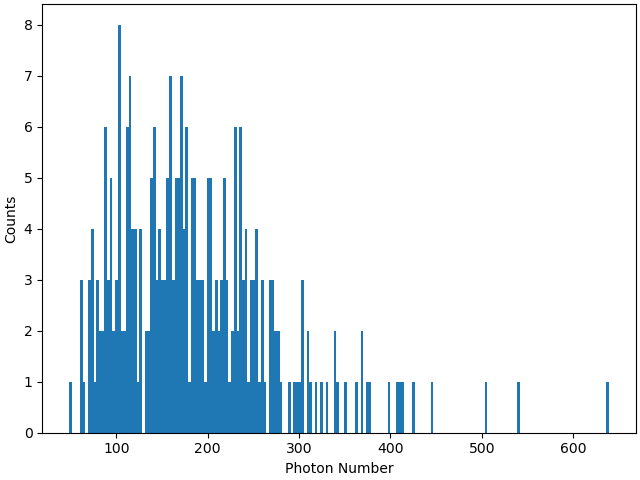

In [61]:
fig, ax = plt.subplots(constrained_layout=True)
ax.hist(initbright_per_particle, bins=200)
ax.set_xlabel('Photon Number')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

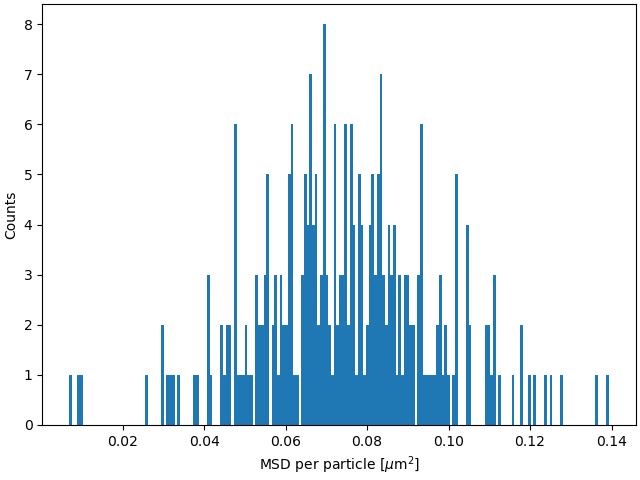

In [62]:
fig, ax = plt.subplots(constrained_layout=True)
ax.hist(msd_per_particle, bins=200)
ax.set_xlabel('MSD per particle [$\mu$m$^2$]')
ax.set_ylabel('Counts')

In [63]:
np.corrcoef(square_displacements, step_brightnesses)

array([[ 1.        , -0.05756688],
       [-0.05756688,  1.        ]])

In [64]:
r = np.mean((square_displacements-np.mean(square_displacements))*(step_brightnesses-np.mean(step_brightnesses)))
r = r/(np.std(square_displacements)*np.std(step_brightnesses))
ntemp = len(square_displacements)
#temp1 = ntemp*np.sum(square_displacements*step_brightnesses)-np.sum(square_displacements)*np.sum(step_brightnesses)
#temp2 = np.sqrt(ntemp*np.sum(square_displacements**2)-np.sum(square_displacements)**2)*np.sqrt(ntemp*np.sum(step_brightnesses**2)-np.sum(step_brightnesses)**2)
#r = temp1/temp2
t = r*np.sqrt((ntemp-2)/(1-r**2))
print('Correlation between each SD and the brightness')
print('Correlation:', r)
print('Samples:', ntemp)
print('t-value:', t)
print('Critical t-value: ~1.960 for alpha 0.05')
print('Critical t-value: ~2.576 for alpha 0.01')
print('Critical t-value: ~3.291 for alpha 0.001')

Correlation between each SD and the brightness
Correlation: -0.05756687920709622
Samples: 5071
t-value: -4.105392088638901
Critical t-value: ~1.960 for alpha 0.05
Critical t-value: ~2.576 for alpha 0.01
Critical t-value: ~3.291 for alpha 0.001


In [65]:
r = np.mean((msd_per_particle-np.mean(msd_per_particle))*(initbright_per_particle-np.mean(initbright_per_particle)))
r = r/(np.std(msd_per_particle)*np.std(initbright_per_particle))
ntemp = len(msd_per_particle)

t = r*np.sqrt((ntemp-2)/(1-r**2))
print('Correlation between each MSD and the initial brightness')
print('Correlation:', r)
print('Samples:', ntemp)
print('t-value:', t)
print('Critical t-value: ~1.960 for alpha 0.05')
print('Critical t-value: ~2.576 for alpha 0.01')
print('Critical t-value: ~3.291 for alpha 0.001')

Correlation between each MSD and the initial brightness
Correlation: -0.11045426441738194
Samples: 278
t-value: -1.8463011902266346
Critical t-value: ~1.960 for alpha 0.05
Critical t-value: ~2.576 for alpha 0.01
Critical t-value: ~3.291 for alpha 0.001


In [77]:
def autocorrelation(sep_indexes, sep_lengths, n):
    temp = []
    for indexes, lengths in zip(sep_indexes, sep_lengths):
        lengths = lengths - np.mean(square_displacements)
        for i in indexes:
            if i+n in indexes:
                temp1 = lengths[np.where(indexes==i)]
                temp2 = lengths[np.where(indexes==n+i)]
                temp.append(temp1*temp2)
    return np.mean(np.array(temp))/(np.std(square_displacements)**2), len(np.array(temp))
    

Iteration 10
Iteration 20
Iteration 30
Iteration 40


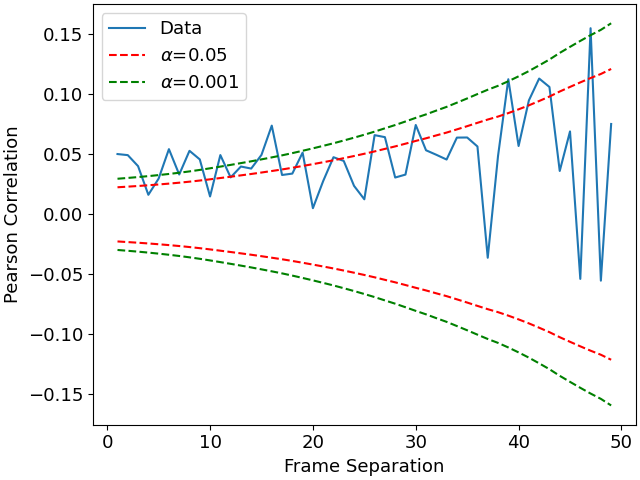

In [85]:
n_autocorrelation = 50
autocorrelation_array = []
number_acorr_values = []
for i in range(1, n_autocorrelation):
    autocorrelation_value, number_autocorr = autocorrelation(separated_indexes, square_displacements_separated, i)
    autocorrelation_array.append(autocorrelation_value)
    number_acorr_values.append(number_autocorr)
    if i%10 == 0:
        print('Iteration', i)
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(np.arange(1, n_autocorrelation), np.array(autocorrelation_array), label='Data')
ax.plot(np.arange(1, n_autocorrelation), 1.960/np.sqrt(np.array(number_acorr_values)), 'r--', label='$\\alpha$=0.05')
ax.plot(np.arange(1, n_autocorrelation), -1.960/np.sqrt(np.array(number_acorr_values)), 'r--')
ax.plot(np.arange(1, n_autocorrelation), 2.576/np.sqrt(np.array(number_acorr_values)), 'g--', label='$\\alpha$=0.01')
ax.plot(np.arange(1, n_autocorrelation), -2.576/np.sqrt(np.array(number_acorr_values)), 'g--')
ax.set_xlabel('Frame Separation')
ax.set_ylabel('Pearson Correlation')
ax.legend()
fig.savefig(results_path.format(f'autocorrelation_divalent_n{n_autocorrelation}'), dpi=150)
plt.rcParams.update({'font.size': 10})

In [86]:
class fit_dist_1(stats.rv_continuous):
    
    def _cdf(self, x, D1):
        return (1.0 - np.exp(-x/(4*D1)))
        
    def _argcheck(self, D1):
        return (0<D1)
    
    def _fitstart(*data):
        return (data[0], 1.0)

class fit_dist_2(stats.rv_continuous):
    
    def _cdf(self, x, f1, D1, D2):
        return (1.0 - f1*np.exp(-x/(4*D1)) - (1.0-f1)*np.exp(-x/(4*D2)))
        
    def _argcheck(self, f1, D1, D2):
        return (0<f1) & (f1<1) & (0<D1) & (0<D2)
    
    def _fitstart(*data):
        return (data[0], 0.5, 1.0, 1.0)
    
class fit_dist_3(stats.rv_continuous):
    
    def _cdf(self, x, f1, f2, D1, D2, D3):
        return (1.0 - f1*np.exp(-x/(4*D1)) - f2*np.exp(-x/(4*D2)) - (1.0-f1-f2)*np.exp(-x/(4*D3)))
        
    def _argcheck(self, f1, f2, D1, D2, D3):
        return (0<f1) & (0<f2) & ((f1+f2)<1) & (0<D1) & (0<D2) & (0<D3)
    
    def _fitstart(*data):
        return (data[0], 1/3, 1/3, 1.0, 1.0, 1.0)
    

In [87]:
data = np.sort(square_displacements/t_del_corrected)
len(square_displacements)

8067

In [121]:
def get_diffusion_values(data, dist_for_fit, initial_guesses, n_bootstrap=400):
    n_spec = int((len(initial_guesses)+1)/2)
    parameters = dist_for_fit.fit(data, *initial_guesses, floc=0.0, fscale=1.0)
    initial_guesses = parameters[:-2]
    results = np.zeros(2*n_spec)
    results[:n_spec-1] = parameters[:n_spec-1]
    results[n_spec-1] = 1.0 - np.sum(parameters[:n_spec-1])
    results[n_spec:] = parameters[n_spec-1:-2]
    results_bootstrap = []
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data))
        p_temp = dist_for_fit.fit(sample, *initial_guesses, floc=0.0, fscale=1.0)
        results_temp = np.zeros(2*n_spec)
        results_temp[:n_spec-1] = p_temp[:n_spec-1]
        results_temp[n_spec-1] = 1.0 - np.sum(p_temp[:n_spec-1])
        results_temp[n_spec:] = p_temp[n_spec-1:-2]
        results_bootstrap.append(results_temp)
    results_bootstrap = np.array(results_bootstrap)
    errors = np.zeros(2*n_spec)
    for i in range(2*n_spec):
        errors[i] = np.std(results_bootstrap[:,i])
    return parameters, results, errors

In [122]:
initial_D_guess = 1.0
n_bootstrap = 1

In [123]:
import time

start = time.time()
start_temp = time.time()
dist_for_fit_1 = fit_dist_1(a=0, name="dist_for_fit_1")
initial_guesses_1 = [initial_D_guess]
parameters_1, results_1, errors_1 = get_diffusion_values(data, dist_for_fit_1, initial_guesses_1, n_bootstrap=n_bootstrap)
end_temp = time.time()
print(f'Fit 1 Species finished after {end_temp-start_temp} s \n')
start_temp = time.time()
dist_for_fit_2 = fit_dist_2(a=0, name="dist_for_fit_2")
initial_guesses_2 = [0.5, initial_D_guess, initial_D_guess]
parameters_2, results_2, errors_2 = get_diffusion_values(data, dist_for_fit_2, initial_guesses_2, n_bootstrap=n_bootstrap)
end_temp = time.time()
print(f'Fit 2 Species finished after {end_temp-start_temp} s \n')
start_temp = time.time()
dist_for_fit_3 = fit_dist_3(a=0, name="dist_for_fit_3")
initial_guesses_3 = [1/3, 1/3, initial_D_guess, initial_D_guess, initial_D_guess]
parameters_3, results_3, errors_3 = get_diffusion_values(data, dist_for_fit_3, initial_guesses_3, n_bootstrap=n_bootstrap)
end_temp = time.time()
print(f'Fit 3 Species finished after {end_temp-start_temp} s \n')
end = time.time()
print(f'Time of {end-start} s required \n')

print(f'1 Species:',
      f'\n100% wtih D={parameters_1[0]} $\mu^2$/s \n')
print(errors_1, '\n')
print(f'2 Species:',
      f'\n{parameters_2[0]*100}% with D={parameters_2[1]} $\mu^2$/s',
      f'\n{(1-parameters_2[0])*100}% with D={parameters_2[2]} $\mu^2$/s \n')
print(errors_2, '\n')
print(f'3 Species:',
      f'\n{parameters_3[0]*100}% with D={parameters_3[2]} $\mu^2$/s',
      f'\n{parameters_3[1]*100}% with D={parameters_3[3]} $\mu^2$/s',
      f'\n{(1-parameters_3[0]-parameters_3[1])*100}% with D={parameters_3[4]} $\mu^2$/s \n')
print(errors_3, '\n')

Fit 1 Species finished after 0.10976433753967285 s 

Fit 2 Species finished after 0.92545485496521 s 

Fit 3 Species finished after 2.198518753051758 s 

Time of 3.2337379455566406 s required 

1 Species: 
100% wtih D=0.9976562499999999 $\mu^2$/s 

[0. 0.] 

2 Species: 
79.24342915974398% with D=1.1472573236066246 $\mu^2$/s 
20.756570840256018% with D=0.42659641868321113 $\mu^2$/s 

[0. 0. 0. 0.] 

3 Species: 
44.3623028275244% with D=1.1473050887233276 $\mu^2$/s 
34.8801972439235% with D=1.14721994769429 $\mu^2$/s 
20.757499928552104% with D=0.4266224202142568 $\mu^2$/s 

[0. 0. 0. 0. 0. 0.] 



In [124]:
print('Immobile diffusion constant guessed at around', D['eps']**2/(4*t_del_corrected))

Immobile diffusion constant guessed at around 0.018939759356986267


In [125]:
stats.kstest(data, lambda x: dist_for_fit_1.cdf(x, *parameters_1))

KstestResult(statistic=0.026662261554424305, pvalue=1.571102030748435e-23)

In [126]:
kstest_results = []
kstest_results.append(stats.kstest(data, lambda x: dist_for_fit_1.cdf(x, *parameters_1)))
kstest_results.append(stats.kstest(data, lambda x: dist_for_fit_2.cdf(x, *parameters_2)))
kstest_results.append(stats.kstest(data, lambda x: dist_for_fit_3.cdf(x, *parameters_3)))
kstest_results = np.array(kstest_results)
kstest_results = kstest_results.reshape(-1)

print('1 Species:', stats.kstest(data, lambda x: dist_for_fit_1.cdf(x, *parameters_1)))
print('2 Species:', stats.kstest(data, lambda x: dist_for_fit_2.cdf(x, *parameters_2)))
print('3 Species:', stats.kstest(data, lambda x: dist_for_fit_3.cdf(x, *parameters_3)))

1 Species: KstestResult(statistic=0.026662261554424305, pvalue=1.571102030748435e-23)
2 Species: KstestResult(statistic=0.007436023331416894, pvalue=0.031809972621386184)
3 Species: KstestResult(statistic=0.0074371550656391755, pvalue=0.031769921541615176)


In [127]:
diffusion_results = pd.DataFrame(data={'1 Species Results': np.pad(results_1,(0,4),constant_values=(np.NAN,np.NAN)), '1 Species Errors': np.pad(errors_1,(0,4),constant_values=(np.NAN,np.NAN)),
                                       '2 Species Results': np.pad(results_2,(0,2),constant_values=(np.NAN,np.NAN)), '2 Species Errors': np.pad(errors_2,(0,2),constant_values=(np.NAN,np.NAN)),
                                       '3 Species Results': results_3, '3 Species Errors': errors_3,
                                       'kstest': kstest_results})


excel_path = results_path.format(f'DiffusionSpecies_useTOCCSL{use_toccsl}_smROI{smroi_id}_{step_size}step.xlsx')
writer = pd.ExcelWriter(excel_path) 
diffusion_results.to_excel(writer, sheet_name='Diffusion Results')
writer.save()
writer.close()

C:\Users\mrdxy\anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


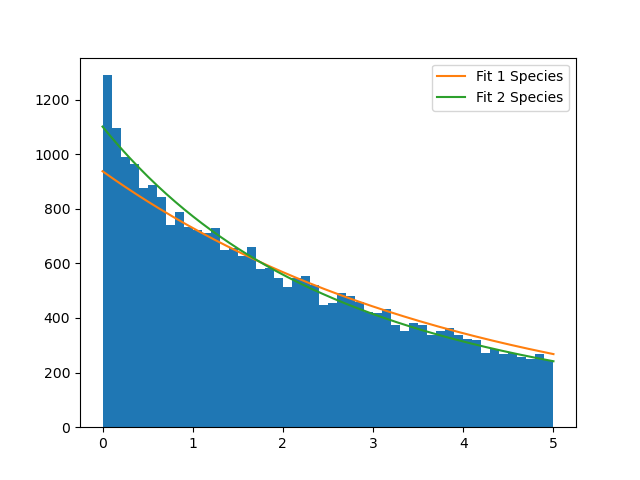

In [135]:
plt.close('all')
lim = 5
bins = 50
plotting = np.linspace(0, lim, 200)
plt.hist(data, bins=bins, range=(0,lim))
plt.plot(plotting, len(data)*(lim/bins)*dist_for_fit_1.pdf(plotting, *parameters_1), label='Fit 1 Species')
plt.plot(plotting, len(data)*(lim/bins)*dist_for_fit_2.pdf(plotting, *parameters_2), label='Fit 2 Species')
#plt.plot(plotting, len(data)*(lim/bins)*dist_for_fit_3.pdf(plotting, *parameters_3), label='Fit 3 Species')
plt.legend()

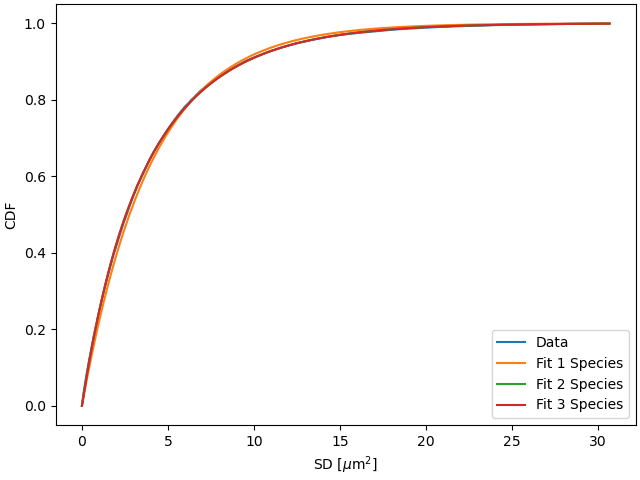

In [129]:
fig, ax = plt.subplots(constrained_layout=True)
plot_vals = np.linspace(min(data), max(data), 200)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data, p, label='Data')
ax.plot(plot_vals, dist_for_fit_1.cdf(plot_vals, *parameters_1), label='Fit 1 Species')
ax.plot(plot_vals, dist_for_fit_2.cdf(plot_vals, *parameters_2), label='Fit 2 Species')
ax.plot(plot_vals, dist_for_fit_3.cdf(plot_vals, *parameters_3), label='Fit 3 Species')
ax.set_xlabel('SD [$\mu$m$^2$]')
ax.set_ylabel('CDF')
ax.legend()

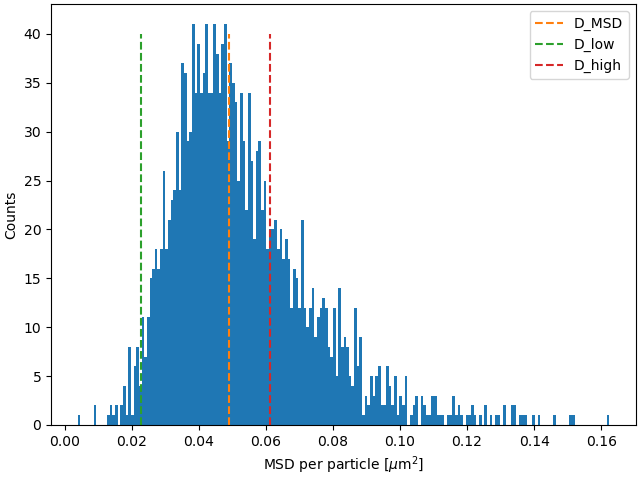

In [133]:
height = 40
D_res = D['D']
D_low = 0.4266224202142568
D_high = 1.1472573236066246
fig, ax = plt.subplots(constrained_layout=True)
ax.hist(msd_per_particle, bins=200)
ax.plot([4*D_res*t_del_corrected, 4*D_res*t_del_corrected], [0, height], '--', label='D_MSD')
ax.plot([4*D_low*t_del_corrected, 4*D_low*t_del_corrected], [0, height], '--', label='D_low')
ax.plot([4*D_high*t_del_corrected, 4*D_high*t_del_corrected], [0, height], '--', label='D_high')
ax.set_xlabel('MSD per particle [$\mu$m$^2$]')
ax.set_ylabel('Counts')
ax.legend()